## NEURAL EVOLUTION FROM SCRATCH

This is a neural network evolved by genetic algorithm using only python and numpy library.  

This implementation is slow and take some hours to converge for good results.  

 I used a minimalist version of blackjack (A game known as 21 or vinte-um in Brazil). 
 

 The neural network use as inputs itself pontuation, the player with higher pontuation less than 21 and the cummulative sum of all cads played until that particular turn.  

<img src='https://brasilcasinos.com.br/images/maos-do-blackjack.jpg'>

Short Game explanation:
    
    - The players start with 2 cards
    - The sum of those cards should be exactly 21 in order to win the game.
    - Each turn, the players CAN DECIDE to draw a new card to try approximate the current value to 21.  
    - Case the sum of all cards in the player's hand is higher than 21,  that player lost the game.
    - The Player with score closest to 21 is the winner.  


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import logistic
import pandas as pd
import copy
from random import shuffle, sample
import random



### Creating a simple blackjack game.

In [3]:
class Game:
    def __init__(self):
        self.deck =  4* range(1,11)
        shuffle(self.deck)
        self.game_running = False
        self.cumulative_draw = 0 
        self.best_player_score = 0
    def start_game(self, player_list):
        while  len([p for p in player_list if p.burn == False and p.stop == False]) > 1:
            for player in [p_t for p_t in player_list if p_t.burn == False and p_t.stop == False]:
                #print player.name,player.points
                if player.decision(self)[0] == 0:
                    player.stop_game()
                else:
                    self.cumulative_draw += player.draw(self.deck)
                if self.best_player_score < player.points:
                    self.best_player_score = player.points
        #print [[p_e.name, p_e.points] for p_e in player_list]
        winner_table =  [p_e for p_e in player_list if p_e.burn == False]
        winner_table = sorted(winner_table, key = lambda x : 21 - x.points)
        #print [p_e.points for p_e in winner_table] 
        #print 'Game ended...'
        
         
        if set([p_end.points for p_end in winner_table]) == 1 or not winner_table:
            #print 'ko'
            return 'ko'
        else:
            #print 'ganhador',   winner_table[0].name 
            return winner_table[0].name
        
        

### Defining the Player class

In [4]:
class Player:
    def __init__(self, name):
        self.stop = False
        self.burn = False
        self.points = 0
        self.name = name
        self.neural_network = None
    def decision(self, game_obj):
        
        out = sample([0,1], 1) # the output shoud be [0] or [1]
        #print out 
        return out  # random behavior
    
    def stop_game(self):
        #print self.name, 'Stop'
        self.stop = True
    def draw(self, deck_game):
        
        card = deck_game.pop()
        #print self.name, 'comprou card', card
        self.points += card
        if self.points > 21:
            self.burn = True
            #print self.name, 'BURNEDD!'
        return card
            
    
    

        

### Gerating simple Players usig Player class inheritance and  overwriting the decision method.

In [5]:
class First_strategy(Player):
    def decision(self, game_obj):
        if self.points < 15:
            return [1]
        else:
            return [0]
    
class Second_strategy(Player):
    def decision(self, game_obj):
        return [1]

### Simulating a simple championship with 3 different players.

In [6]:
matchs = []

for x in range(100):
    jogo = Game()
    lucas = First_strategy('Lucas')
    miura = Player('Miura')
    sergio = Second_strategy('Sergio')
    
    matchs.append(jogo.start_game([lucas, miura, sergio]))

print len([m for m in matchs if m == 'Miura'])
print matchs

6
['Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Sergio', 'Miura', 'Sergio', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Sergio', 'Lucas', 'Sergio', 'Miura', 'Lucas', 'Lucas', 'Miura', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Miura', 'Miura', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Miura', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas']


###  Neural network class implementation with forward propagation

In [7]:
class Network:
    def __init__(self, input_number = 2):
        self.l_1 = np.random.uniform(-1,1, [10,input_number])

        self.l_2 = np.random.uniform(-1,1,[10,10])
        self.l_end = np.random.uniform(-1,1,[1,10])
        self.layers_stack = [self.l_1 , self.l_2 , self.l_end]
    
    
    def sigmoid (self, x): return 1/(1 + np.exp(-x))
    
    def foward(self, input_value):
        #print input_value
        res_l1 =  np.array([self.sigmoid(l1_s) for l1_s in      input_value.dot(self.l_1.T)])
        res_l2 = np.array([ self.sigmoid(l2_s)  for l2_s in     res_l1.dot(self.l_2.T)])
        res_end = np.array([self.sigmoid (l_r) for l_r in       res_l2.dot(self.l_end.T)])
        #print res_end
        return res_end
    
    def mutate(self, layer):
        index_to_mutate = [np.random.randint(layer.shape[0]), np.random.randint(layer.shape[1])]
        #print 'mutate',  np.random.uniform(-1, 1)
        layer[index_to_mutate[0], index_to_mutate[1]] += np.random.uniform(-0.01, 0.01)
        
        
    def mutate_all_layers(self):
        for l in self.layers_stack:
            self.mutate(l)
    

### Creating a Neural Network Player

The decision method returns 0 (stop),1 (draw a card)
The inputs  are: 

- Agent score.
- Highest opponent pontuation.
- Sum of all cards played until that moment

In [8]:
class Neural_strategy(Player):
    def decision(self, game_obj):
        best_rank_player = game_obj.best_player_score
        #print best_rank_player
        #print  [self.neural_network.foward(np.array([ self.points, best_rank_player ,game_obj.cumulative_draw]))]

        return [int(round(self.neural_network.foward(np.array([ self.points, best_rank_player ,game_obj.cumulative_draw]))))]

    def init_neural_activity(self):
        self.neural_network = Network(input_number = 3)
    def reset_status(self):
        self.stop = False
        self.burn = False
        self.points = 0
        

        

### Training/Evolving the neural networks

using the follow parameters. 
-  population = 500  
-  iterations = 100  
- matchs per championship = 300  
- The two best AI neural networks are choosed to ploriferate and mutate.  
- Fitness fuction is given as the mean of championship won games. 

In [11]:
best_and_mean_scores = []
p_size= 500
population = [Neural_strategy('AI') for n in range(0,p_size)]

[p.init_neural_activity() for p in population] #starting network random weights

from tqdm import tqdm
for i_n in range(100):
    fitness = []
    for ai in tqdm(population):
        matchs = []
        f = 0
        for x in range(50):
            jogo = Game()
            lucas = First_strategy('Lucas')
            matchs.append(jogo.start_game([ ai, lucas]))
            ai.reset_status()
        #print matchs
        f =  100 * (len([m for m in matchs if m == 'AI'])/float(len(matchs)))
        #print f 
        fitness.append(f)
    higher_fitness = sorted( [[f, p_f] for f , p_f in zip(fitness, population)], key=lambda s: s[0])
    print 'Iteration MEAN:', np.mean([v[0] for v in higher_fitness])
        
    loss_str= 'Best value: {}'.format(str(higher_fitness[-1][0]))
    best_and_mean_scores.append([higher_fitness[-1][0], np.mean([v[0] for v in higher_fitness])])
    itr_str = 'Iteration: {}'.format( str(i_n))
    print itr_str, loss_str
    #print [ h[0] for h in  higher_fitness[-5:]]
    best_creatures = higher_fitness[-10:]
    #print [float(b_c) for b_c in best_creatures]
    population = [copy.deepcopy(random.choice(best_creatures)[1]) for i in range(0, p_size)]
    [p_m.neural_network.mutate_all_layers() for p_m in population]

    

  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 11.14
Iteration: 0 Best value: 50.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 28.756
Iteration: 1 Best value: 52.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 37.312
Iteration: 2 Best value: 60.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 37.784
Iteration: 3 Best value: 58.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 38.252
Iteration: 4 Best value: 64.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 38.628
Iteration: 5 Best value: 64.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 38.348
Iteration: 6 Best value: 58.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 38.64
Iteration: 7 Best value: 56.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 38.684
Iteration: 8 Best value: 68.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 38.496
Iteration: 9 Best value: 58.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 38.836
Iteration: 10 Best value: 60.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 38.632
Iteration: 11 Best value: 56.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.028
Iteration: 12 Best value: 58.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.284
Iteration: 13 Best value: 68.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 38.904
Iteration: 14 Best value: 60.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.364
Iteration: 15 Best value: 62.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.168
Iteration: 16 Best value: 68.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.528
Iteration: 17 Best value: 62.0


100%|██████████| 500/500 [00:40<00:00, 11.18it/s]


Iteration MEAN: 39.028
Iteration: 18 Best value: 58.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.704
Iteration: 19 Best value: 62.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 38.736
Iteration: 20 Best value: 58.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.3
Iteration: 21 Best value: 58.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.728
Iteration: 22 Best value: 66.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.48
Iteration: 23 Best value: 62.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.236
Iteration: 24 Best value: 60.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.956
Iteration: 25 Best value: 62.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.772
Iteration: 26 Best value: 62.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.296
Iteration: 27 Best value: 56.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.484
Iteration: 28 Best value: 62.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.74
Iteration: 29 Best value: 58.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.32
Iteration: 30 Best value: 60.0


100%|██████████| 500/500 [00:41<00:00, 12.77it/s]


Iteration MEAN: 40.348
Iteration: 31 Best value: 64.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.304
Iteration: 32 Best value: 62.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.784
Iteration: 33 Best value: 60.0


100%|██████████| 500/500 [00:41<00:00, 12.07it/s]


Iteration MEAN: 40.608
Iteration: 34 Best value: 60.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.988
Iteration: 35 Best value: 64.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.74
Iteration: 36 Best value: 62.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.764
Iteration: 37 Best value: 66.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.36
Iteration: 38 Best value: 66.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.796
Iteration: 39 Best value: 60.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.788
Iteration: 40 Best value: 64.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.776
Iteration: 41 Best value: 62.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.304
Iteration: 42 Best value: 62.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.64
Iteration: 43 Best value: 64.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.7
Iteration: 44 Best value: 64.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 39.736
Iteration: 45 Best value: 60.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 40.136
Iteration: 46 Best value: 64.0


100%|██████████| 500/500 [00:39<00:00, 10.85it/s]


Iteration MEAN: 40.808
Iteration: 47 Best value: 64.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 41.204
Iteration: 48 Best value: 62.0


100%|██████████| 500/500 [00:38<00:00, 12.62it/s]


Iteration MEAN: 41.156
Iteration: 49 Best value: 62.0


In [107]:
## Ploting the mean game values 

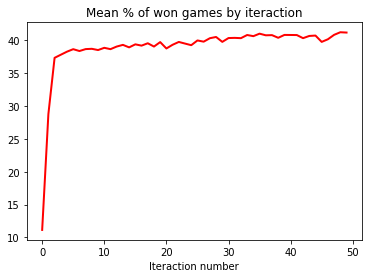

In [18]:
df_training = pd.DataFrame(best_and_mean_scores, columns=['best_result', 'mean_result'])


plt.plot(df_training['mean_result'], color= 'red', lw=2)
plt.title('Mean % of won games by iteraction')
plt.xlabel('Iteraction number')
plt.show()

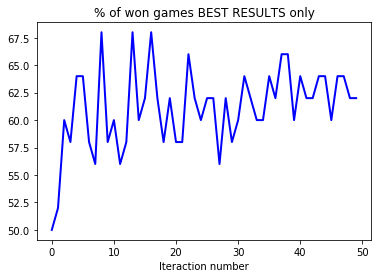

In [17]:
plt.plot(df_training['best_result'], color= 'blue', lw=2)
plt.title('% of won games BEST RESULTS only')
plt.xlabel('Iteraction number')
plt.show()

In [225]:
score_teste = 0
for g in range(1000):
    jogo = Game()
    lucas = First_strategy('Lucas')
    ai = copy.deepcopy(best_creatures[-1][1])

    r =  jogo.start_game([lucas, ai])
    if r =='AI':
        score_teste +=1
    ai.reset_status()
score_teste

516

In [139]:
score_teste = 0
for g in range(100):
    if   == "ai":
        score_teste +=1
    ai.reset_status()
    score_teste

0

In [136]:
print jogo.start_game([lucas, ai])
ai.reset_status()

Lucas


In [100]:
print jogo.start_game([lucas, ai])
ai.reset_status()

Lucas
